In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from IPython.display import Image

In [ ]:
#loading the dataset
dataset = pd.read_csv('/content/drive/My Drive/BigMart_dataset/train_modified.csv')

dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#split dataset in features and target variable
feature_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
                'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2',
                'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
                'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
                'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15']


In [ ]:
# Features
X = dataset[feature_cols] 

print(X)

S = dataset.Item_Outlet_Sales

#converting float values into int
S1 = S.round(0).astype(int)

# Target variable
y = S1

print(y)

      Item_Weight  Item_Visibility  ...  Item_Type_14  Item_Type_15
0       10.395000         0.073297  ...             0             0
1       12.792854         0.035400  ...             0             0
2       12.792854         0.057557  ...             0             0
3       15.850000         0.121633  ...             0             0
4       15.850000         0.121532  ...             0             0
5       12.792854         0.113720  ...             0             0
6       12.792854         0.031382  ...             0             0
7       10.500000         0.116577  ...             0             0
8        6.635000         0.073297  ...             0             0
9        5.465000         0.073297  ...             0             0
10      11.100000         0.176573  ...             0             0
11      12.792854         0.049381  ...             0             0
12       5.260000         0.041764  ...             0             0
13      12.792854         0.078362  ...         

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test


In [ ]:
#Function definition to visualize the decision tree

def gettreeImg(clf,columns):
    dot_data = tree.export_graphviz(clf,
                                    feature_names=columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    colors = ('turquoise', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])
    return graph

In [ ]:
# Apply Random forest for multi-Classification

from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

0.5084082909659757


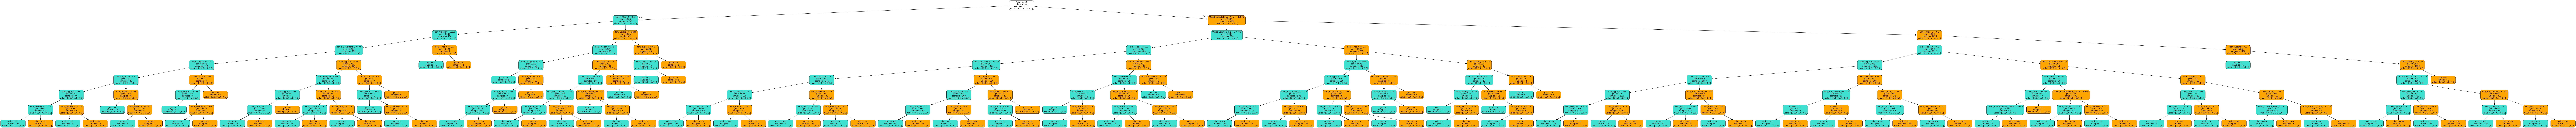

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import collections
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
Image(gettreeImg(clf.estimators_[5],feature_cols).create_png())

In [ ]:
#loading the dataset
train_df = pd.read_csv('/content/drive/My Drive/BigMart_dataset/train_modified.csv')

test_df = pd.read_csv('/content/drive/My Drive/BigMart_dataset/test_modified.csv')

In [ ]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Remember the target had been normalized
    Sq_train = (dtrain[target])**2
#Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],Sq_train , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

ImportError: ignored

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])

RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')


Model Report
RMSE : 1068
CV Score : Mean - 1093 | Std - 77.02 | Min - 931.8 | Max - 1268


In [ ]:
# Random Forest Classifier


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
clf.fit(train_df,test_df)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)